# Assignment 7
## Part 1 - Making a general function to perform Simulated Annealing
First we import the libraries required

In [1]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Here we have defined a function `yfunc` with many minima.

And have taken a bunch of points to plot.

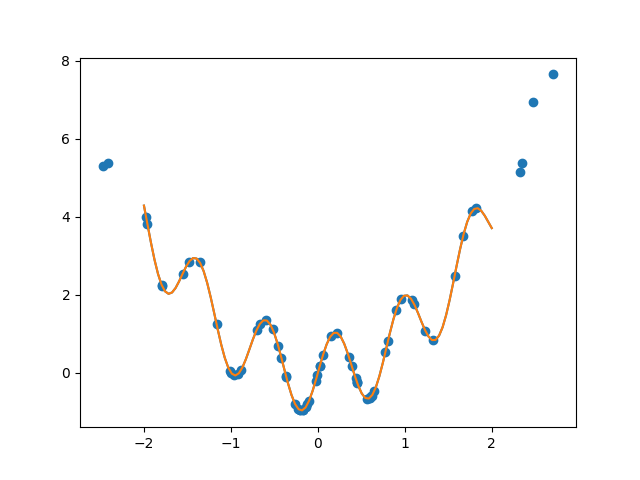

In [27]:
# Function with many minima
def yfunc(x):
    return x**2 + np.sin(8*x)

xbase = np.linspace(-2, 2, 100)
ybase = yfunc(xbase)
plt.plot(xbase, ybase)
plt.show()

Now we have coded the general function `multivar`.

This takes in the input parameters:

-`f`: The function which we have to optimize

-`best_start`: The starting coordinates.

-`bestcost`: This can be given some high value to start off the simulated annealing.

-`T` and `decayrate`: The temperature and Decayrate.

-`itr`: The number of iterations to run for.

In the function we use `d_all` to generate the random points and proceed with the SA. We return `coord` and `final` which have the coordinates for each successful iteration and the value for each iteration, respectively.

We also plt all the points, with the starting point marked with black and the final iteration being marked with a blue dot, while also printing the minimized value.

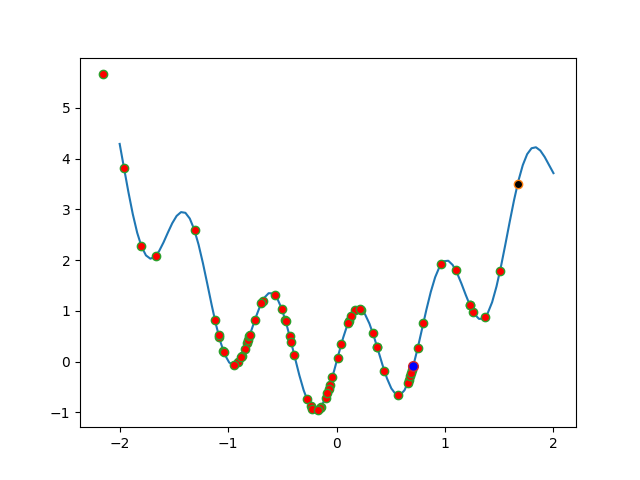

The final minimized value being : -0.0782012929609942


In [52]:
rangemin, rangemax = -2, 2 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)

def multivar(f,best_start,bestcost,T,decayrate,itr):
    num=len(best_start)
    best=best_start
    coord=[]
    temp=0
    final=[]
    for i in range(itr):
        d_all=[(np.random.random_sample()-0.5)*T for t in range(num)]
        current=[]
        for j in range(num):
            current.append(best[j] + d_all[j])
        temp=f(*current)
        if temp < bestcost:
            bestcost=temp
            best=current
            coord.append(current)
            final.append(temp)
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(temp-bestcost)/T):
                bestcost = temp
                best = current
                coord.append(current)
                final.append(temp)
        T = T * decayrate
    return coord,final
x1,y1=multivar(yfunc,[2],10000,3,0.99,100)
x2=[]
for i in x1:
    x2.append(i[0])
plt.plot(x2[0],y1[0],'o',markerfacecolor='black')
plt.plot(x2[1:9999],y1[1:9999],'o',markerfacecolor='red')
plt.plot(x2[-1],y1[-1],'o-',markerfacecolor='blue',markersize=7)
plt.show()
print('The final minimized value being :',y1[-1])

The above graph is plotted because it is 2-D, ideally we can minimize any function with any number of variables, `multivar` is capable of it.

## Part 2 - Travelling Salesman
First we read the file and get our data, we can change the dataset by changing the mentioned file.

We then plot it so see what we are working with.

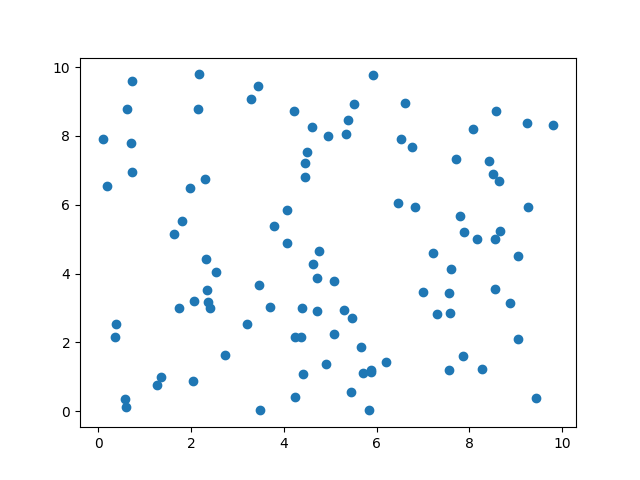

In [72]:
f1=open('tsp_100.txt','r') #Change file name here for other datasets
lines=f1.readlines()
f1.close()
num=int(lines[0])
xdata=[]
ydata=[]

for i in range(1,num+1):
    xdata.append(float(lines[i].split()[0]))
    ydata.append(float(lines[i].split()[1]))
initial_order=[i for i in range(num)]
plt.clf()
plt.scatter(xdata,ydata)
plt.show()

## Branch and Bound Algorithm
Here to solve the travelling salesman problem, I am using an algorithm called `Branch and Bound`. In this method we start at a city and find the cost of going to another city from that city.

Once we find all costs, we see which has the least cost and proceed there.

This goes on and on till we finish all cities.

More details on how the matrices are initialised and reduced can be found here [link](https://www.gatevidyalay.com/travelling-salesman-problem-using-branch-and-bound-approach/).

In [73]:
#code starts

This block finds the initial cost of the initialised matrix, which is the sum of reductions of the initial matrix.

It also reduces the matrix and returns it as `M`.

In [74]:
def cost1(M):
    cost=0
    for i in range(len(M)):
        m = min(M[i])
        if m==0:
            continue
        else:
            for j in range(len(M[i])):
                M[i][j]-=m
                M[j][i]-=m
            cost+=m
    return cost,M

This function finds the distance between two points.

In [75]:
def distance(x1,y1,x2,y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

This function initialises the Matrix for a set of cities, we use `10000` instead of `infinity` as it is large enough.

The details can be found in the link provided above.

In [76]:
def matrix_ini():
    M=[[]for i in range(num)]
    for i in range(num):
        for j in range(num):
            if i==j:
                M[i].append(10000)
            else:
                M[i].append(distance(xdata[i],ydata[i],xdata[j],ydata[j]))
    return M

This function takes in a matrix `a`, initial city position `n1` and final city position `n2` as input parameters.

It then finds the cost of going from `n1` to `n2` and returns it as `cost`.

`a` has the be the reduced matrix.

In [77]:
def cost(a,n1,n2):
    N=[x[:] for x in a]
    cost=0
    for i in range(len(N)):
        for j in range(len(N)):
            if i == n1 or j == n2:
                N[i][j]=10000
    N[n2][n1]=10000
    for i in range(len(N)):
        m=min(N[i])
        if m==0 or m>9000:
            continue
        else:
            for j in range(len(N[i])):
                N[i][j]-=m
            cost+=m
    for i in range(len(N)):
        m=N[0][i]
        for j in range(len(N)):
            if N[j][i]<m:
                m=N[j][i]
        if m ==0 or m>9000:
            continue
        else:
            for j in range(len(N)):
                N[j][i]-=m
            cost+=m
    return(cost) 

This function takes in reduced matrix `RM`, available cities `search` and the starting city `st` as input parameters.

It then finds the least costing city to go to from `search` by calling `cost` again and again in it.

It returns the chosen city as `pos`.

In [78]:
def choose_node(RM,search,st):
    CM=matrix_ini()
    cost_ini,RM=cost1(CM)
    least=10000000
    T=RM
    st
    f=[x for x in search]
    for i in f:
        # print(T)
        k=cost(T,st,i)
        # print('wow',T)
        temp=k+cost_ini+T[st][i]
        # print(i,k,T[st][i],temp)
        if temp < least:
            least = temp
            pos = i
    return pos

This function finds the total distance of a path given to it.

It takes in `x` and `y` which are the data points of the path and finds the distance by calling `distance` again and again.

In [79]:
def path(x,y):
    x1=list(x)
    y1=list(y)
    s=0
    for i in range(len(x1)-1):
         s+=distance(x1[i],y1[i],x1[i+1],y1[i+1])
    return s

This function arranges the points in the order of the path found

In [80]:
def arrange():
    global xplot, yplot
    xplot = np.array(xdata)[final_order] 
    yplot = np.array(ydata)[final_order]
    xplot = np.append(xplot, xplot[0])
    yplot = np.append(yplot, yplot[0])

This is the final block where we can choose our starting point using `st` and go about finding the path.

We print the final order found.

In [83]:
st=2
final_order=[st]
CM=matrix_ini()
cost_ini,RM=cost1(CM)
total=[i for i in range(len(CM))]
total.remove(st)
while(len(final_order)<len(CM)):
    node=choose_node(RM,total,final_order[-1])
    final_order.append(node)
    total.remove(node)
print("The final Order of cities",final_order)
arrange()  

The final Order of cities [2, 5, 4, 89, 41, 17, 88, 16, 6, 76, 18, 7, 99, 80, 36, 21, 22, 3, 54, 53, 97, 31, 55, 29, 59, 71, 90, 96, 73, 64, 28, 91, 20, 83, 9, 66, 43, 79, 32, 33, 62, 98, 13, 23, 78, 67, 35, 69, 77, 85, 10, 8, 26, 49, 48, 75, 58, 46, 82, 51, 47, 68, 45, 56, 87, 92, 72, 57, 38, 63, 95, 61, 60, 94, 40, 74, 24, 12, 84, 42, 50, 15, 39, 19, 30, 86, 25, 93, 14, 27, 65, 52, 34, 0, 70, 1, 44, 81, 37, 11]


Here we find the distance taken and print it, along with plotting the path.

The distance of the path 97.25947869817864


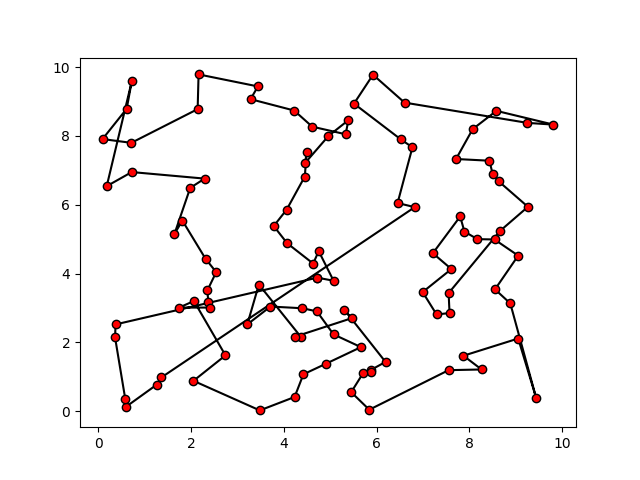

In [85]:
print("The distance of the path",path(xplot,yplot))
plt.clf()
plt.plot(xplot, yplot,'o-',markerfacecolor='red', color='black')
plt.show()

## Why use Branch and Bound?
Branch and Bound method is usually used for optimisation. I initiqally thought of using Nearest Neighbour algorithm, coupled with SA, but it was too heavy for my laptop and was taking long to run.

I researched and found out that this algorithm is much efficient with an easy implementation as well. It is quite modular and provided me with some mathematical insight into what is **cost** and so on. I also found out that this gives good solutions for upto **300** cities.

It was also quite easy to manipukate the matrices and the flow of the program is easy to understand after going through the resource(which I have linked above).

Hence I used **Branch and Bound** to solve the **Travelling Salesman Problem**.